# Ford GoBike System Data Analysis
## by Abdallah Badran

## Investigation Overview

> In this analysis we investigate several factors that may affect a biker trip duration and other insights in common with most of the trips 

## Dataset Overview

> The dataset consists of 183412 members of Ford GoBike system with 19 fetaures after perfoming some feature engineering and data wrangling. The attributes include the trip duration, age, start and end stations, gender and others 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Create new 'age' column to compute members' ages in 2019
df['age'] = 2019 - df['member_birth_year']

In [4]:
# Filling the missing values in the age column with mean 
df['age'].fillna(df['age'].mean(), inplace = True)
# Change the age column to int data type
df['age'] = df['age'].astype(int)

In [5]:
# Converting the start time and end time columns from string to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])   
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
# Convert start time to days and hours columns 
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

In [7]:
# A function to compute frequncy of each level of a categorical variable 
def categ_freq(x, order, xlabel, ylabel ,title):
    """A function to compute the frequency of each level of a categorical variable
    x (string): The column name of a categorical variable
    order (series): order of plotting levels of the categorical variable
    xlabel (string): label for x-axis
    ylabel (string): label for y-axis
    title (string): The title of the plot 
    """
    plt.figure(figsize = [8, 5])
    sb.countplot(data = df, x = x, order = order, color = sb.color_palette()[0])
    plt.xlabel(xlabel, fontsize= 12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)

In [8]:
# A function to compute a hsitogram 
def hist(x, bins, xlabel, ylabel, title):
    """A function to compute the histogram for a given column name 
    x (string): The column name of a variable
    bins (list): bin edge for each column 
    xlabel (string): label for x-axis 
    """
    plt.figure(figsize = [8, 5])
    plt.hist(data = df, x = x, bins = bins)
    plt.xlabel(xlabel, fontsize= 12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)

## Distribution of trips' durations

> Trips' durations in this dataset take a normal distribution on a log scale with a peak between 600 and 700 seconds which is 10 minutes and 11.67 minutes with frequency of 10k. 

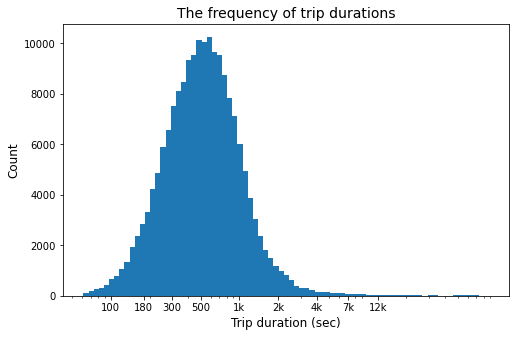

In [9]:
# The distribution of trips' durations in a log scale
bins = 10 ** np.arange(np.log10(df['duration_sec']).min(), np.log10(df['duration_sec']).max()+0.04, 0.04)
hist('duration_sec', bins, 'Trip duration (sec)', 'Count', 'The frequency of trip durations')
plt.xscale('log')
ticks = [100, 180, 300, 500, 1000, 2000, 4000 ,7000 ,12000]
ticks_labels = ['100', '180', '300', '500', '1k', '2k', '4k' ,'7k' ,'12k']
plt.xticks(ticks, ticks_labels);

## Distribution of start hour

> The distribution of start hours is bimodal with one peak at 8 am and the other peak is at 5 pm (17). 

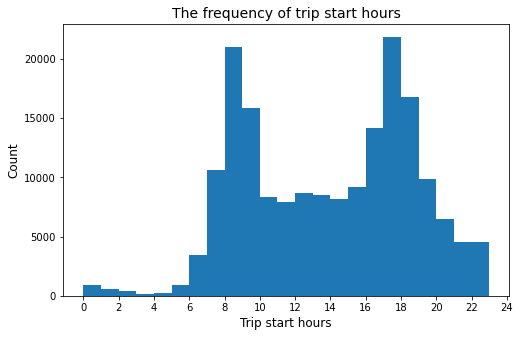

In [10]:
# The distribution of the start hours
bins = np.arange(0, 23+1, 1)
hist('start_hour', bins, 'Trip start hours', 'Count', 'The frequency of trip start hours')
plt.xticks(np.arange(0, 25, 2), np.arange(0, 25, 2));

## Start hour Vs trip duration
> Members that start their trips at 2 am or 3 am have the longest trip duartions on average. 

In [11]:
# A function to plot catgegorical levels Vs quantitative variables
def categ_quant(x, y, xlabel, ylabel, title):
    """
    This function plots the levels of the catgerical variable of 'x' Vs the average of the quantitative variable 'y' 
    x (string): column name of a categorical variable
    y (string): column name of a quantitative variable
    """
    plt.figure(figsize = [8, 5])
    sb.barplot(data = df, x = x, y = y, color = sb.color_palette()[0], errwidth = 0);
    plt.xlabel(xlabel, fontsize= 12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)

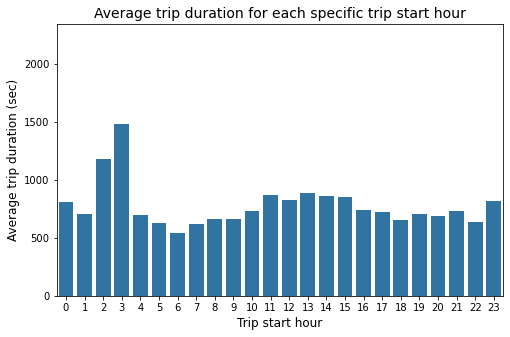

In [12]:
# Start hour Vs trip duration 
categ_quant('start_hour', 'duration_sec', 'Trip start hour', 'Average trip duration (sec)', 'Average trip duration for each specific trip start hour')

## User type Vs trip duration 
> Customers have larger trip durations than subscribers in average, customers have about 1400 seconds (23 minutes) while subscribers have about 600 seconds (10 minutes) in average. 

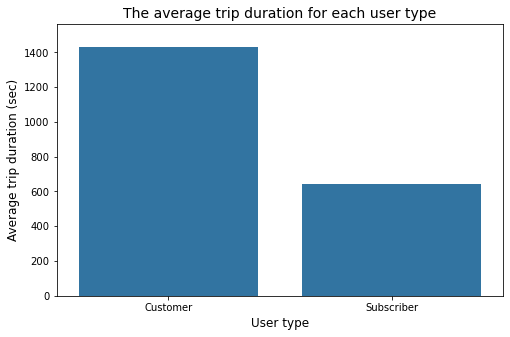

In [13]:
# Investigating duration-user_type relationship
categ_quant('user_type', 'duration_sec', 'User type', 'Average trip duration (sec)', 'The average trip duration for each user type')